# VISUALIZATION OF CENSUS DATA

### Student Name: Ahsan Aftab

### Submitted to:  PROFESSOR JUAN LUIS CANO RODRIGUEZ

### Dated: 22-03-18

In [82]:
#Some prework
#Load important libraries

# Data Manipulation #################################################################
import numpy as np
import pandas as pd
import math


# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

# Feature Selection and Encoding
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning 
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#import tensorflow as tf

# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline

In [151]:
#Check python path
import sys
sys.path

['',
 'C:\\Users\\Ahsan\\Anaconda3\\python36.zip',
 'C:\\Users\\Ahsan\\Anaconda3\\DLLs',
 'C:\\Users\\Ahsan\\Anaconda3\\lib',
 'C:\\Users\\Ahsan\\Anaconda3',
 'C:\\Users\\Ahsan\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\Ahsan\\Anaconda3\\lib\\site-packages\\Babel-2.5.0-py3.6.egg',
 'C:\\Users\\Ahsan\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\Ahsan\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Ahsan\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Ahsan\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Ahsan\\.ipython']

In [150]:
#Check Python version
import platform
print(platform.python_version())

3.6.3


In [149]:
#Special Functions Section: In this I will define some function that might be used in the rest of the notebook
# Encode the categorical features as numbers
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

# Objective-1: 

###  Definition: Produce a pandas DataFrame with proper column names, an appropriate index and correct handling of missing data (e.g. use of None or NaN where appropriate)

In [10]:
# Load Training and Test Data Sets
headers = ['age', 'workclass', 'fnlwgt', 
           'education', 'education-num', 
           'marital-status', 'occupation', 
           'relationship', 'race', 'sex', 
           'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 
           'predclass']
training_raw = pd.read_csv('adult.data', 
                       header=None, 
                       names=headers, 
                       sep=',\s', 
                       na_values=["?"], 
                       engine='python')
test_raw = pd.read_csv('adult.test', 
                      header=None, 
                      names=headers, 
                      sep=',\s', 
                      na_values=["?"], 
                      engine='python', 
                      skiprows=1)

In [11]:
# Join Datasets
dataset_raw = training_raw.append(test_raw)
dataset_raw.reset_index(inplace=True)
dataset_raw.drop('index',inplace=True,axis=1)

In [148]:
# Let's have a quick look at our data
dataset_raw.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
0,39,Non-fed-gov,77516,Bachelors,13,Never-Married,Admin,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp,83311,Bachelors,13,Married,Office Labour,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Separated,Manual Labour,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,Dropout,7,Married,Manual Labour,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married,Professional,Wife,Black,Female,0,0,40,South-America,0


### Visualizing the Missing data in our complete dataset

We will handle the missing data where found appropriate for the relevant visualization

Following plot shows that there is no missing data for numerical variables.

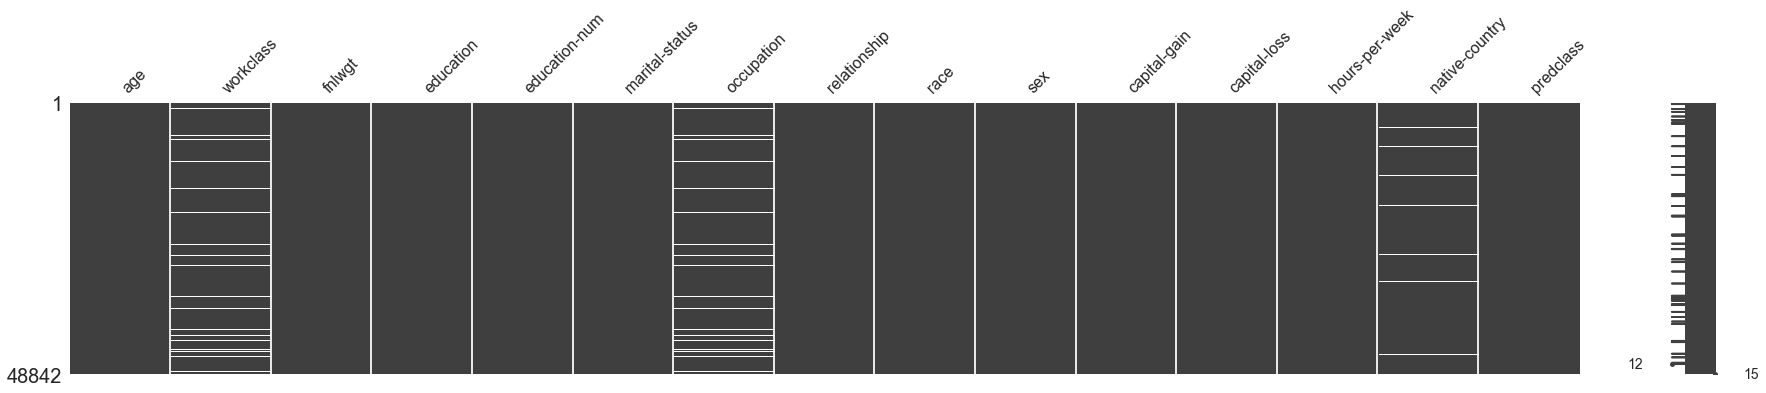

In [123]:
# So how many missing values are there in our dataset?
missingno.matrix(dataset_raw, figsize = (30,5))

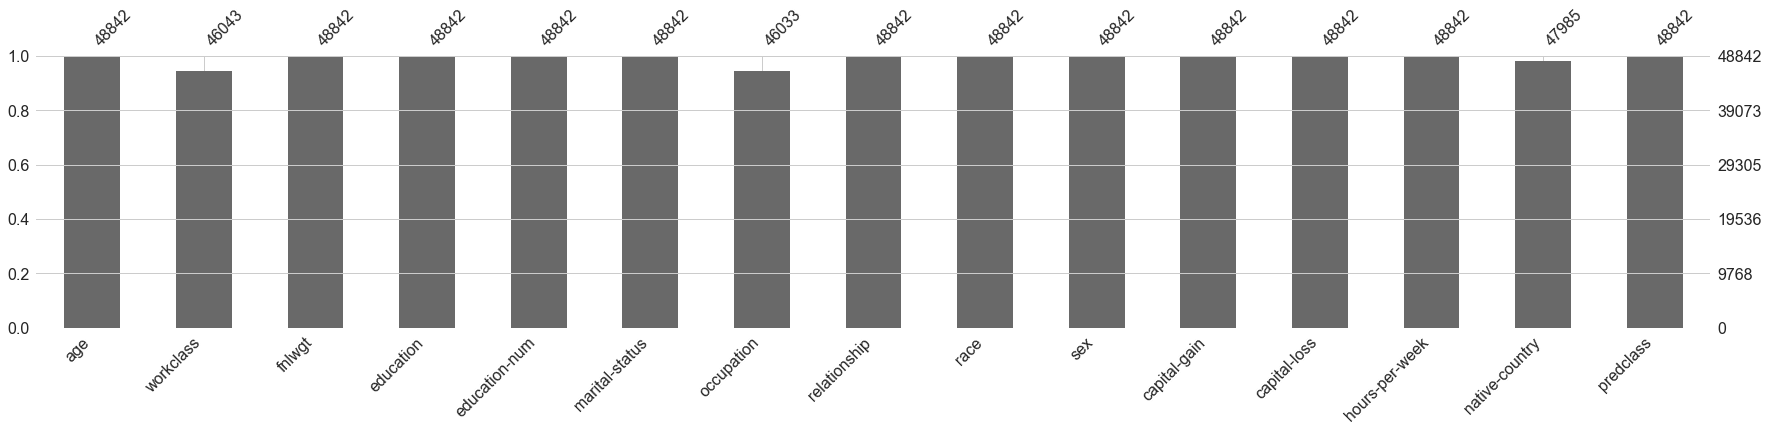

In [152]:
missingno.bar(dataset_raw, sort='ascending', figsize = (30,5))


# Objective-2:
### Definition: Visualize the correlation of the numerical variables

When exploring our dataset and its features, we have many options available to us. We can explore each feature individually, or compare pairs of features, finding the correlation between. Let's start with some simple Univariate (one feature) analysis.


####  Numerical Variables: any feature that contains numeric values.


In [118]:
# Describing all the Numerical Features
dataset_raw.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


We have 6 Numerical variables

### Visualizing the correlation of numerical variables

In [129]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

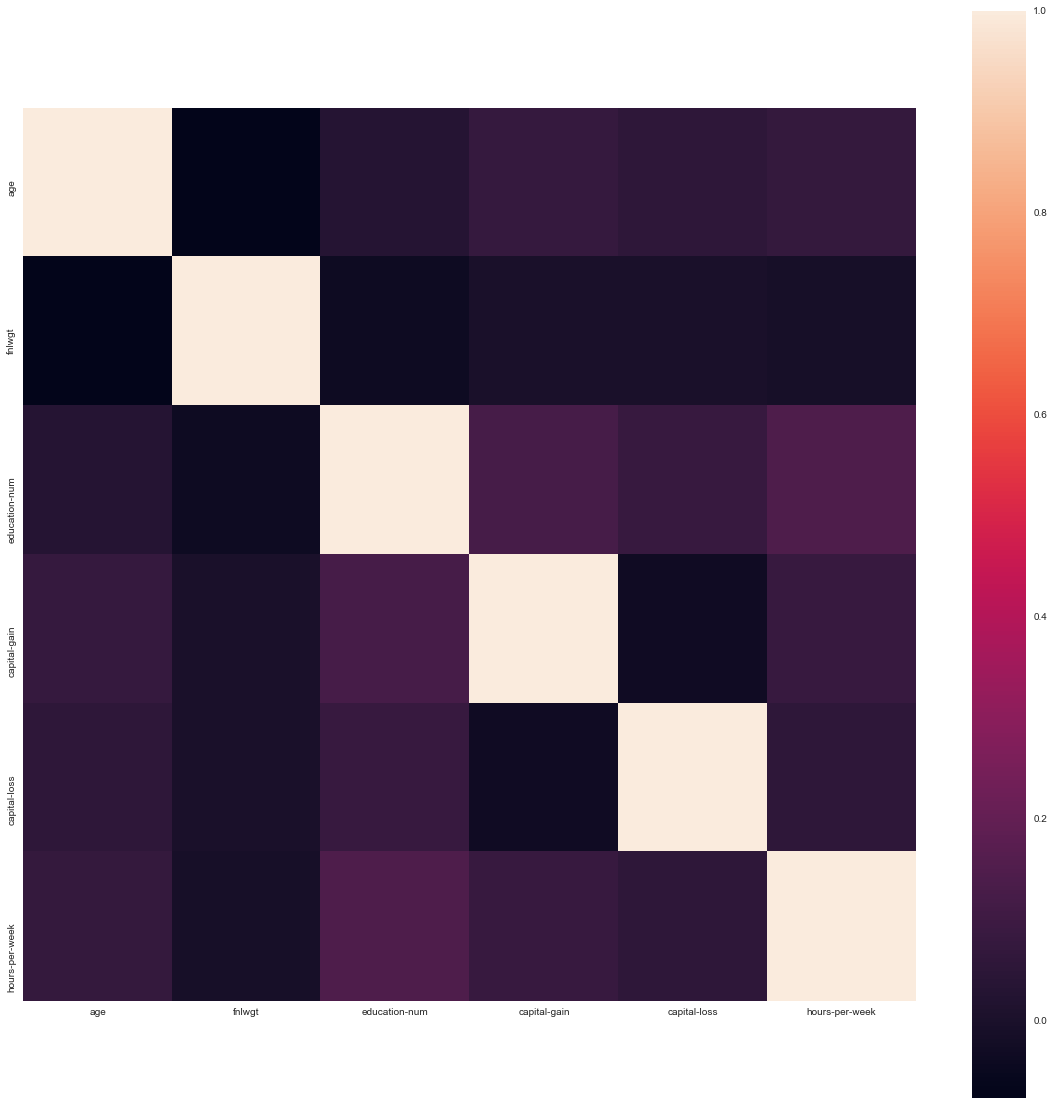

In [136]:
import math
dataset_raw2 = dataset_raw.select_dtypes(include=numerics)
#dataset_con=dataset_con.fillna("")
plt.subplots(figsize=(20,20))
sns.heatmap(dataset_raw2.corr(), square=True)
plt.show()

### Distribution of each Numerical Variable on Histogram

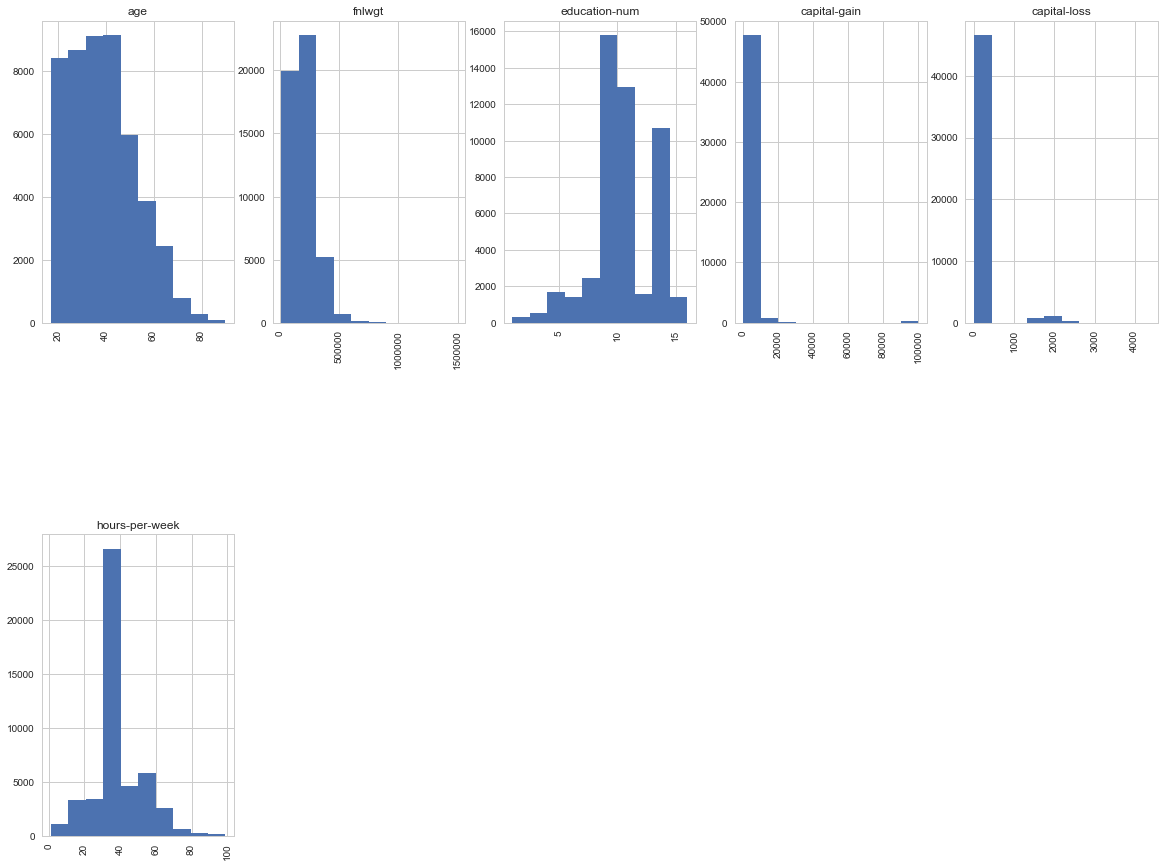

In [131]:
import math
dataset_raw2 = dataset_raw.select_dtypes(include=numerics)

#Lets fill na with "" in order to fix str to float error
dataset_raw2=dataset_raw2.fillna("")

#Plot all the feature histograms
encoded_data, encoders = number_encode_features(dataset_raw2)
fig = plt.figure(figsize=(20,15))
cols = 5
rows = math.ceil(float(encoded_data.shape[1]) / cols)
for i, column in enumerate(encoded_data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    encoded_data[column].hist(axes=ax)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

# Objective-3:

### Definition: Visualize the relationships between Age, Work Hours and earning <= or > 50k, displaying the effect of Sex, Race and Education as well

 Age, 
 Work Hours 
 earning <= or > 50k
 
 displaying the effect of Sex, Race and Education as well
 
 
 For earning <= or >= we will use the column 'predclass' with 
 1 indicating >50k salary
 0 indicating <=50k salary
 
 This step requires addition of two dataframes, with some feature engineering on each of 6 variables.

In [238]:
#Some pre-work data frames
# To perform our data analysis, let's create new dataframes.
dataset_bin = pd.DataFrame() # for discretised continuous variables 
dataset_con = pd.DataFrame() # for our continuous variables 


#### Feature: Earning

In [237]:
# Let's fix the predclass
dataset_raw.loc[dataset_raw['predclass'] == '>50K', 'predclass'] = 1
dataset_raw.loc[dataset_raw['predclass'] == '>50K.', 'predclass'] = 1
dataset_raw.loc[dataset_raw['predclass'] == '<=50K', 'predclass'] = 0
dataset_raw.loc[dataset_raw['predclass'] == '<=50K.', 'predclass'] = 0

dataset_bin['predclass'] = dataset_raw['predclass']
dataset_con['predclass'] = dataset_raw['predclass']
dataset_bin.head()
#dataset_con.head()

,predclass
0,0
1,0
2,0
3,0
4,0


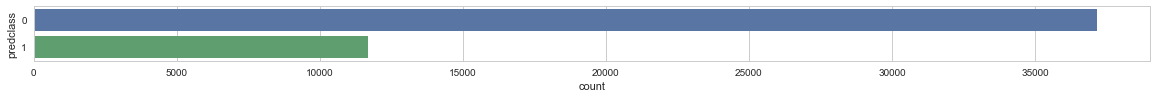

In [146]:
#predclass distribution indicating lower salaries for majority 
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,1)) 
sns.countplot(y="predclass", data=dataset_bin);

#### Feature: Age

We will use the Pandas Cut function to bin the data in equally sized buckets. We will also add our original feature to the dataset_con dataframe.

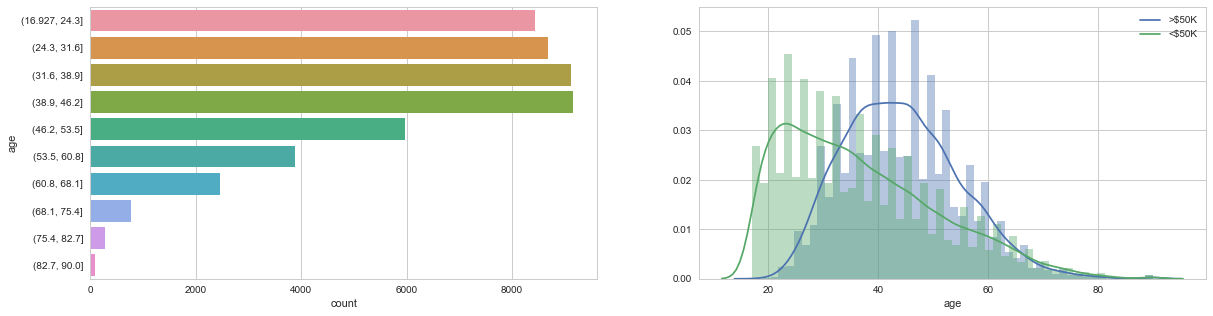

In [170]:
dataset_bin['age'] = pd.cut(dataset_raw['age'], 10) # discretised 
dataset_con['age'] = dataset_raw['age'] # non-discretised

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age", data=dataset_bin);
plt.subplot(1, 2, 2)
sns.distplot(dataset_con.loc[dataset_con['predclass'] == 1]['age'], kde_kws={"label": ">$50K"});
sns.distplot(dataset_con.loc[dataset_con['predclass'] == 0]['age'], kde_kws={"label": "<$50K"});

#### Feature: Working Hours

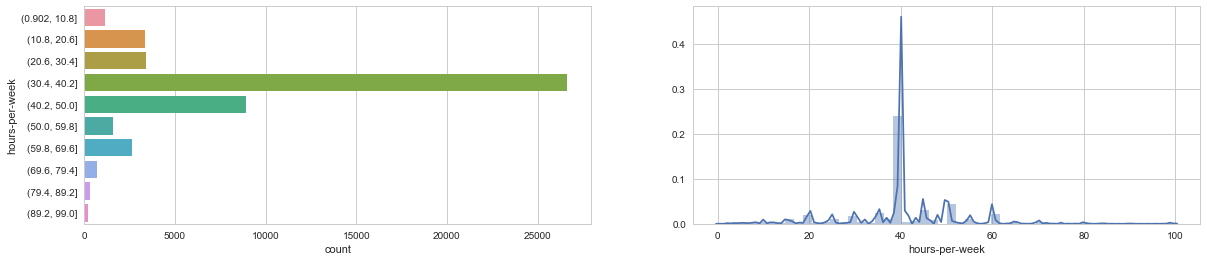

In [171]:
# Let's use the Pandas Cut function to bin the data in equally sized buckets
dataset_bin['hours-per-week'] = pd.cut(dataset_raw['hours-per-week'], 10)
dataset_con['hours-per-week'] = dataset_raw['hours-per-week']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,4)) 
plt.subplot(1, 2, 1)
sns.countplot(y="hours-per-week", data=dataset_bin);
plt.subplot(1, 2, 2)
sns.distplot(dataset_con['hours-per-week']);

Referring to the missing values plot on the top of report, we can conclude that there are no missing values for Education, Sex and Race

####  Feature: Education

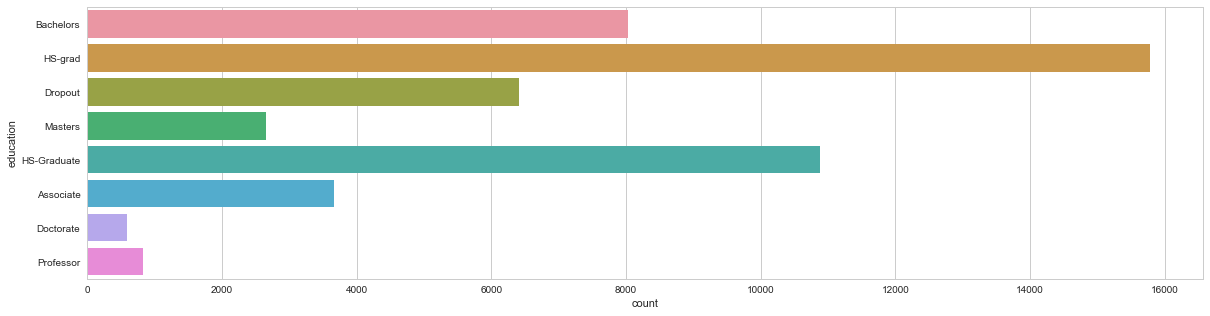

In [177]:
# Can we bucket some of these groups? And yes, we can.
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,5)) 
sns.countplot(y="education", data=dataset_raw);

In [178]:
dataset_raw.loc[dataset_raw['education'] == '10th'          , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '11th'          , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '12th'          , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '1st-4th'       , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '5th-6th'       , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '7th-8th'       , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '9th'           , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == 'Assoc-acdm'    , 'education'] = 'Associate'
dataset_raw.loc[dataset_raw['education'] == 'Assoc-voc'     , 'education'] = 'Associate'
dataset_raw.loc[dataset_raw['education'] == 'Bachelors'     , 'education'] = 'Bachelors'
dataset_raw.loc[dataset_raw['education'] == 'Doctorate'     , 'education'] = 'Doctorate'
dataset_raw.loc[dataset_raw['education'] == 'HS-Grad'       , 'education'] = 'HS-Graduate'
dataset_raw.loc[dataset_raw['education'] == 'Masters'       , 'education'] = 'Masters'
dataset_raw.loc[dataset_raw['education'] == 'Preschool'     , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == 'Prof-school'   , 'education'] = 'Professor'
dataset_raw.loc[dataset_raw['education'] == 'Some-college'  , 'education'] = 'HS-Graduate'

dataset_bin['education'] = dataset_raw['education']
dataset_con['education'] = dataset_raw['education']

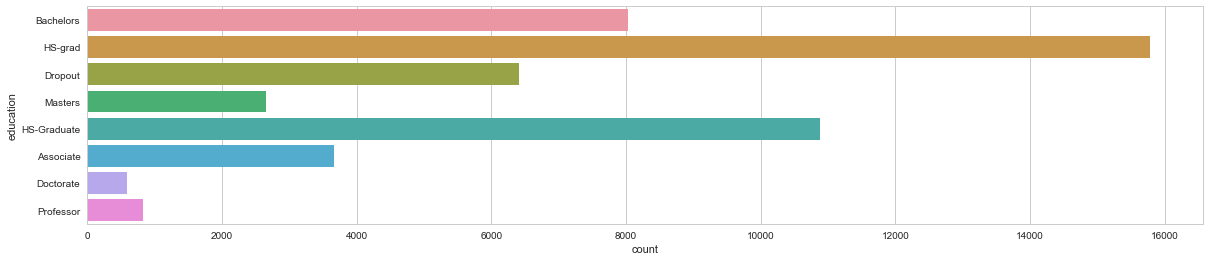

In [179]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="education", data=dataset_bin);

#### Feature: Sex

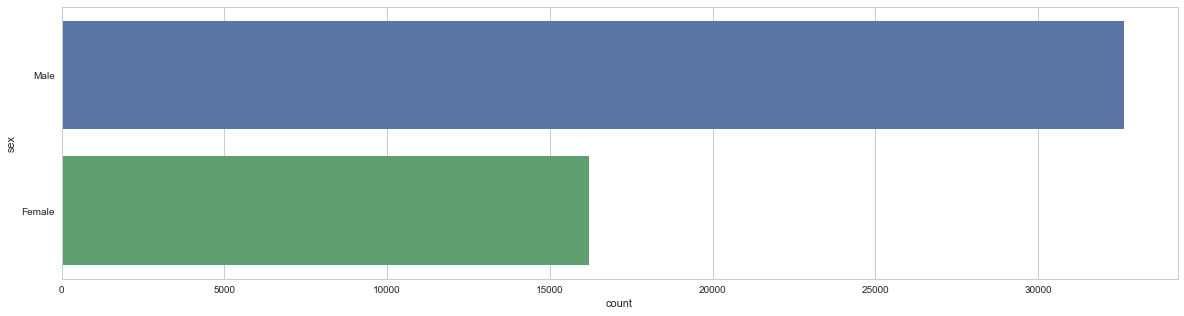

In [180]:
# Can we bucket some of these groups? not necessary
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,5)) 
sns.countplot(y="sex", data=dataset_raw);

#### Feature: Race

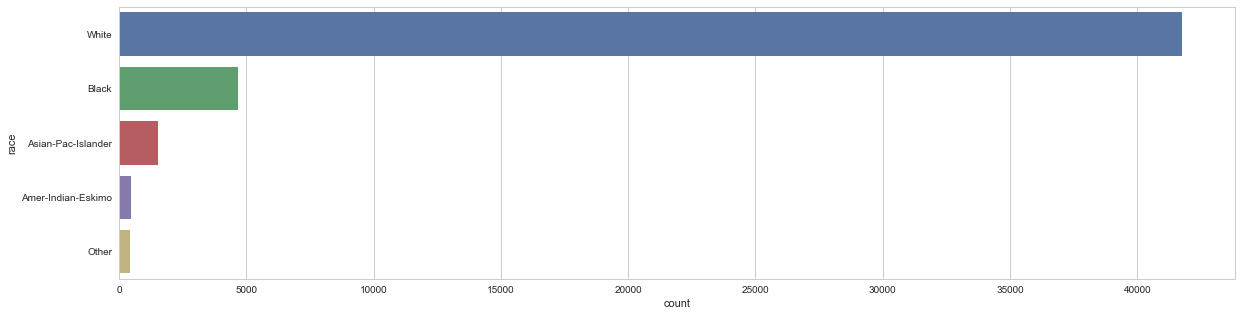

In [181]:
# Can we bucket some of these groups? not necessary
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,5)) 
sns.countplot(y="race", data=dataset_raw);

In [239]:
#Lets look at our datasets

dataset_con['sex'] = dataset_bin['sex'] = dataset_raw['sex']
dataset_con['race'] = dataset_bin['race'] = dataset_raw['race']


In [240]:
dataset_con.head()

,sex,race
0,Male,White
1,Male,White
2,Male,White
3,Male,Black
4,Female,Black


In [241]:
dataset_bin.head()

,sex,race
0,Male,White
1,Male,White
2,Male,White
3,Male,Black
4,Female,Black


### Lets perform an analysis of income with sex,education and race counts

predclass --> sex,education,race


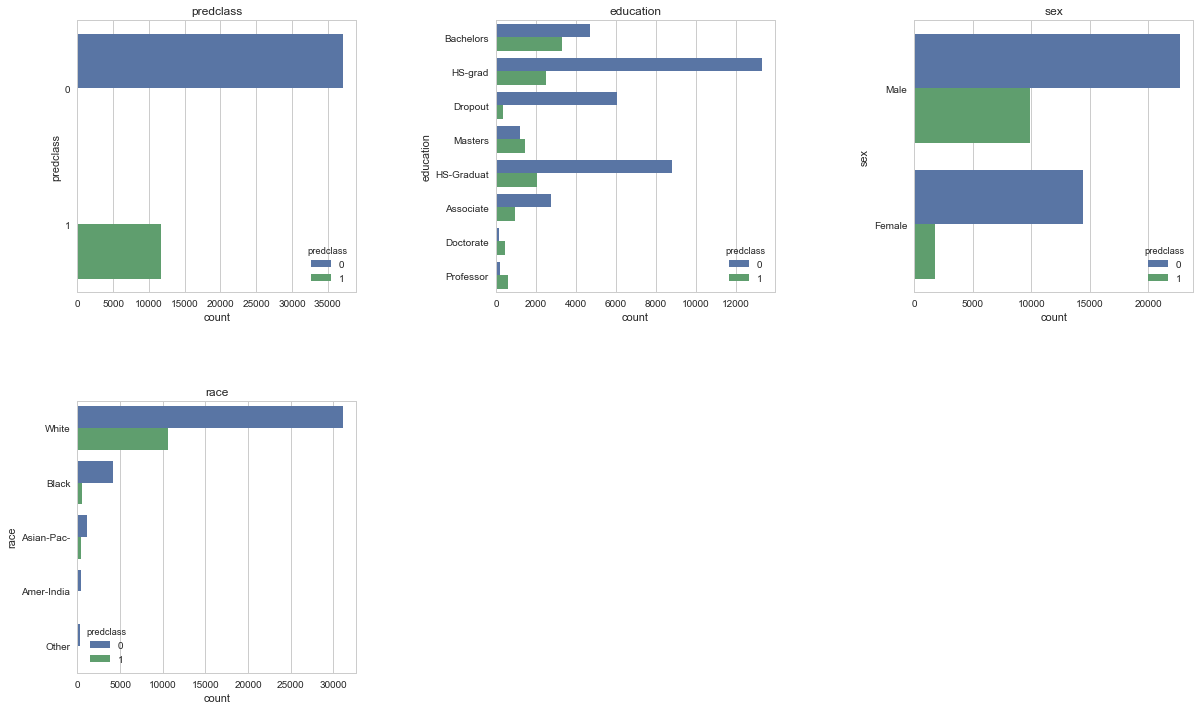

In [195]:
#Predclass
# Plot a count of the categories from each categorical feature split by our predclass
def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    dataset = dataset.select_dtypes(include=[np.object])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            
plot_bivariate_bar(dataset_con, hue='predclass', cols=3, width=20, height=12, hspace=0.4, wspace=0.5)

## Bivariate Analysis

We will perform analysis of salary with age, working hours, sex, race and education

###  salary and age

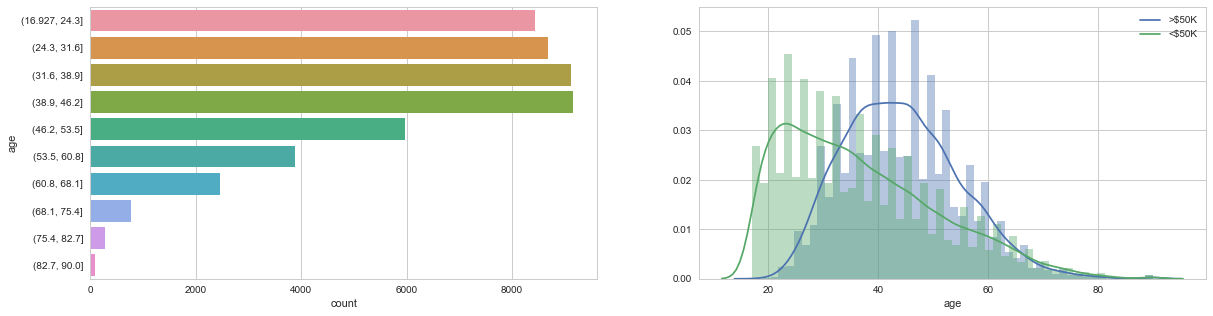

In [207]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age", data=dataset_bin);
plt.subplot(1, 2, 2)
sns.distplot(dataset_con.loc[dataset_con['predclass'] == 1]['age'], kde_kws={"label": ">$50K"});
sns.distplot(dataset_con.loc[dataset_con['predclass'] == 0]['age'], kde_kws={"label": "<$50K"});

### salary and working hours

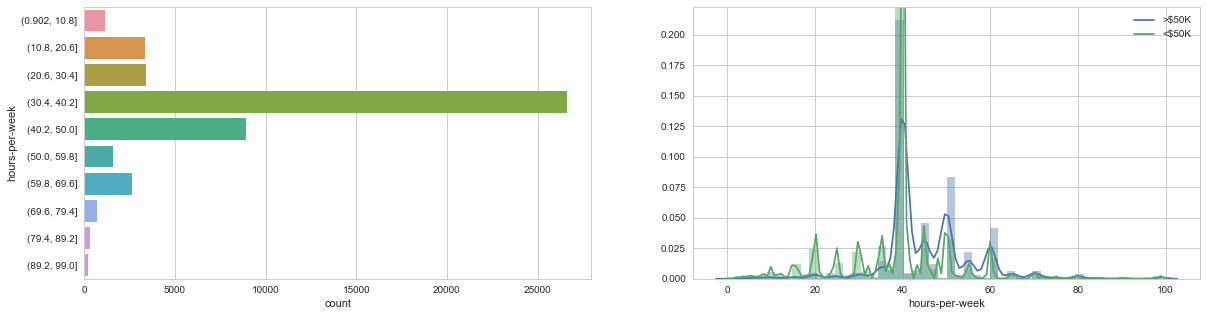

In [208]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y='hours-per-week', data=dataset_bin);
plt.subplot(1, 2, 2)
sns.distplot(dataset_con.loc[dataset_con['predclass'] == 1]['hours-per-week'], kde_kws={"label": ">$50K"});
sns.distplot(dataset_con.loc[dataset_con['predclass'] == 0]['hours-per-week'], kde_kws={"label": "<$50K"});

### salary and education

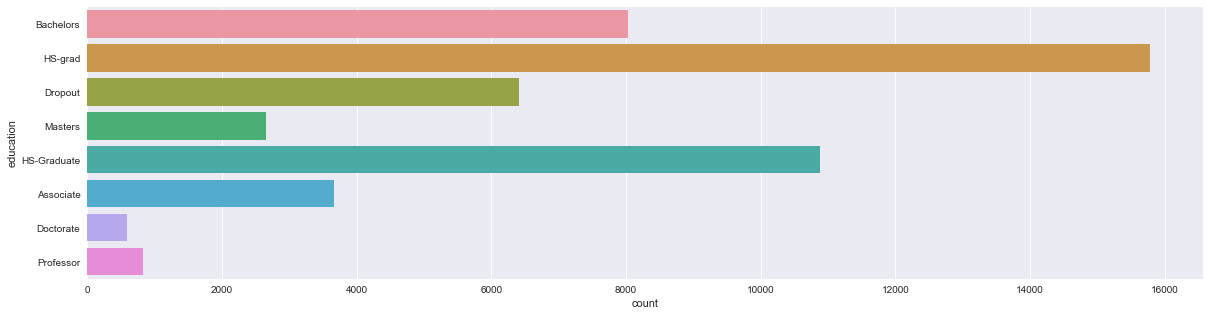

In [94]:
# Lets try to bucket education feeature
plt.style.use('seaborn')
plt.figure(figsize=(20,5)) 
sns.countplot(y="education", data=dataset_raw);

In [44]:
dataset_raw.loc[dataset_raw['education'] == '10th'          , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '11th'          , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '12th'          , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '1st-4th'       , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '5th-6th'       , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '7th-8th'       , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '9th'           , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == 'Assoc-acdm'    , 'education'] = 'Associate'
dataset_raw.loc[dataset_raw['education'] == 'Assoc-voc'     , 'education'] = 'Associate'
dataset_raw.loc[dataset_raw['education'] == 'Bachelors'     , 'education'] = 'Bachelors'
dataset_raw.loc[dataset_raw['education'] == 'Doctorate'     , 'education'] = 'Doctorate'
dataset_raw.loc[dataset_raw['education'] == 'HS-Grad'       , 'education'] = 'HS-Graduate'
dataset_raw.loc[dataset_raw['education'] == 'Masters'       , 'education'] = 'Masters'
dataset_raw.loc[dataset_raw['education'] == 'Preschool'     , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == 'Prof-school'   , 'education'] = 'Professor'
dataset_raw.loc[dataset_raw['education'] == 'Some-college'  , 'education'] = 'HS-Graduate'

dataset_bin['education'] = dataset_raw['education']
dataset_con['education'] = dataset_raw['education']

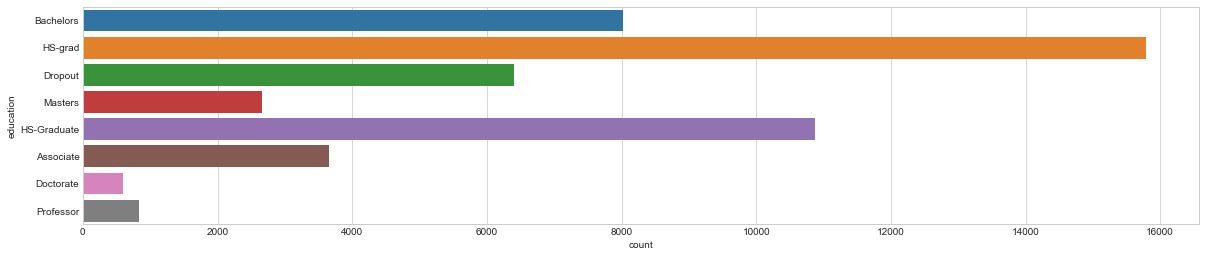

In [45]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="education", data=dataset_bin);

### salary and sex

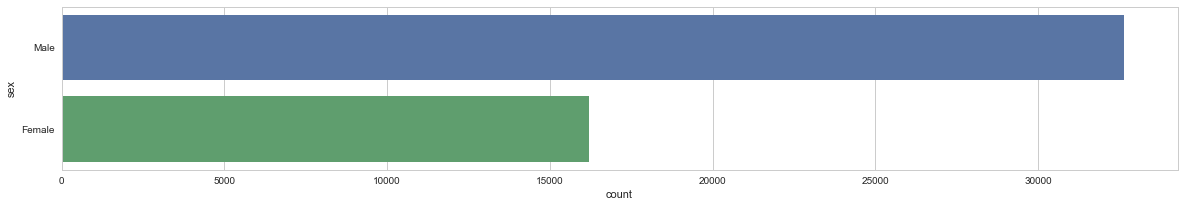

In [196]:
plt.figure(figsize=(20,3)) 
sns.countplot(y="sex", data=dataset_raw);

### salary and race

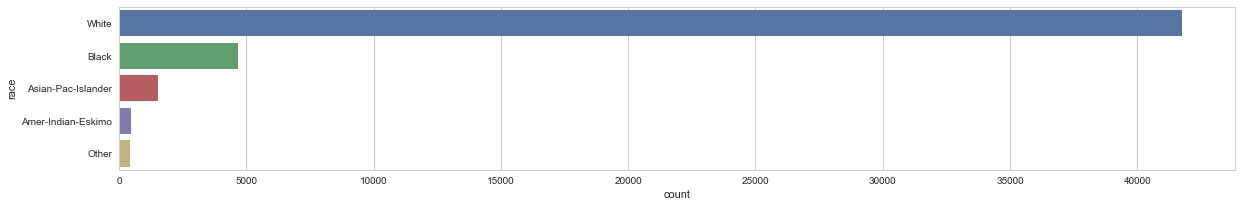

In [205]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,3)) 
sns.countplot(y="race", data=dataset_bin);

## Analysing 3 variables at a time

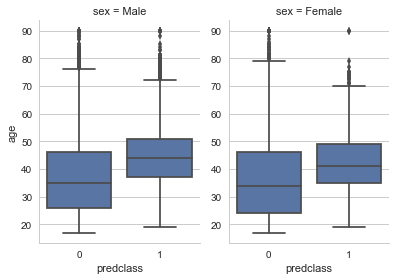

In [210]:
# Effect of Age and Sex on Income, across Sex.
plt.style.use('seaborn-whitegrid')
g = sns.FacetGrid(dataset_con, col='sex', size=4, aspect=.7)
g = g.map(sns.boxplot, 'predclass', 'age')

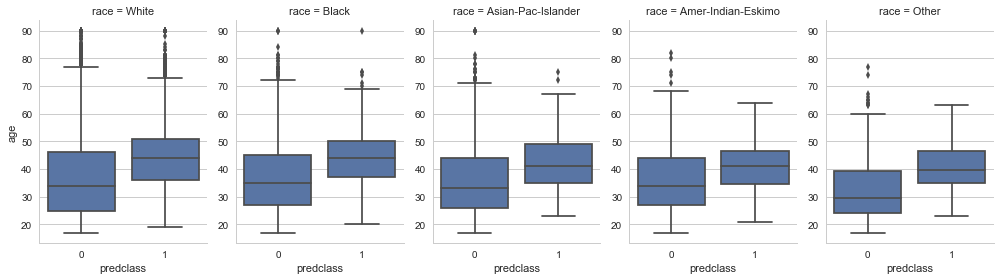

In [213]:
# Effect of Race and Age on Income, across Race.
plt.style.use('seaborn-whitegrid')
g = sns.FacetGrid(dataset_con, col='race', size=4, aspect=.7)
g = g.map(sns.boxplot, 'predclass', 'age')

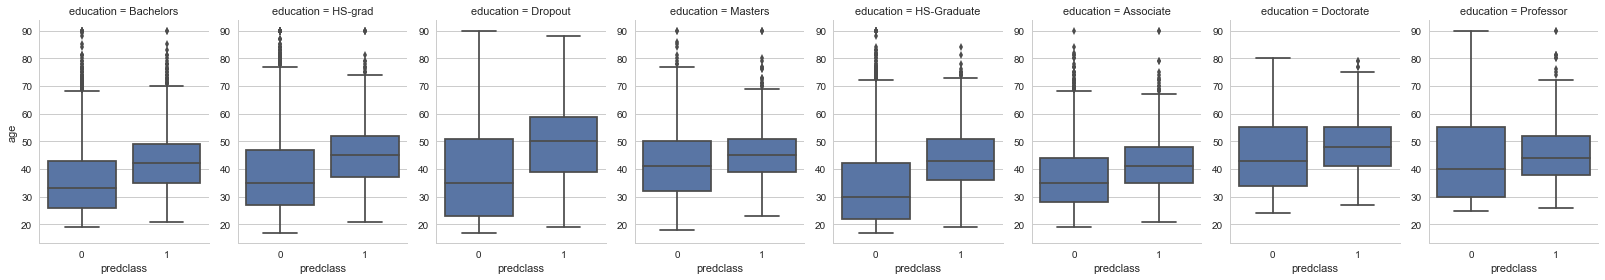

In [217]:
# Effect of age and Education on Income, across Education.
plt.style.use('seaborn-whitegrid')
g = sns.FacetGrid(dataset_con, col='education', size=4, aspect=.7)
g = g.map(sns.boxplot, 'predclass', 'age')

### Historical Trends on the Sex, Race, Education, HPW and Age impact on Income.

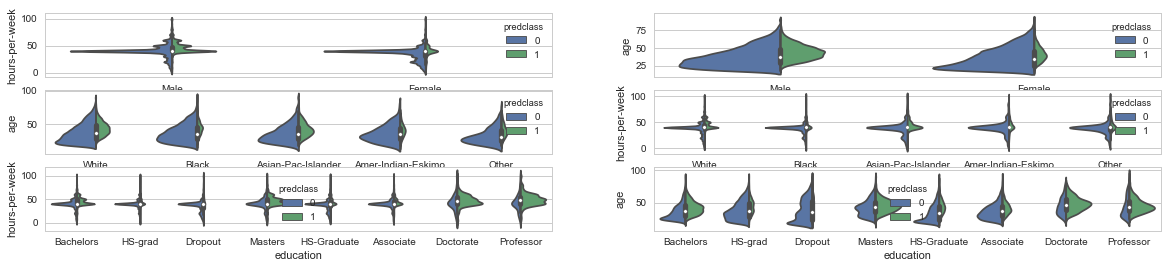

In [221]:
# Historical Trends on the Sex, Race, Education, HPW and Age impact on Income.
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,4)) 

plt.subplot(3, 2, 1)
sns.violinplot(x='sex', y='hours-per-week', hue='predclass', data=dataset_con, split=True, scale='count');

plt.subplot(3, 2, 2)
sns.violinplot(x='sex', y='age', hue='predclass', data=dataset_con, split=True, scale='count');

plt.subplot(3, 2, 3)
sns.violinplot(x='race', y='age', hue='predclass', data=dataset_con, split=True, scale='count');

plt.subplot(3, 2, 4)
sns.violinplot(x='race', y='hours-per-week', hue='predclass', data=dataset_con, split=True, scale='count');

plt.subplot(3, 2, 5)
sns.violinplot(x='education', y='hours-per-week', hue='predclass', data=dataset_con, split=True, scale='count');

plt.subplot(3, 2, 6)
sns.violinplot(x='education', y='age', hue='predclass', data=dataset_con, split=True, scale='count');

### Interaction between pairs of age, hpw and predclass

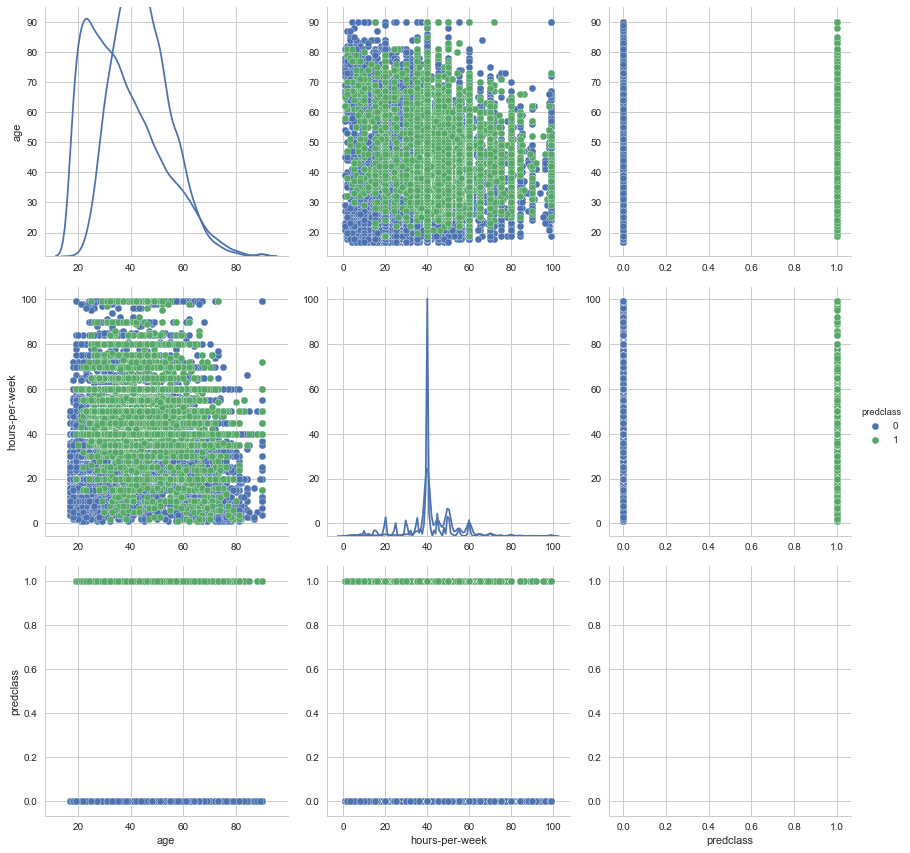

In [222]:
# Interaction between pairs of features.
sns.pairplot(dataset_con[['age','hours-per-week','predclass']], 
             hue="predclass", 
             diag_kind="kde",
             size=4);

### One hot encoding step

In [228]:
#One hot encoding
one_hot_cols = dataset_bin.columns.tolist()
one_hot_cols.remove('predclass')
dataset_bin_enc = pd.get_dummies(dataset_bin, columns=one_hot_cols)
dataset_bin_enc.head()

,predclass,"age_(16.927, 24.3]","age_(24.3, 31.6]","age_(31.6, 38.9]","age_(38.9, 46.2]","age_(46.2, 53.5]","age_(53.5, 60.8]","age_(60.8, 68.1]","age_(68.1, 75.4]","age_(75.4, 82.7]",...,education_HS-grad,education_Masters,education_Professor,sex_Female,sex_Male,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [230]:
# Label Encode all labels
dataset_con_enc = dataset_con.apply(LabelEncoder().fit_transform)

dataset_con_enc.head()

,predclass,age,hours-per-week,education,sex,race
0,0,22,39,1,1,4
1,0,33,12,1,1,4
2,0,21,39,5,1,4
3,0,36,39,3,1,2
4,0,11,39,1,0,2


### Correlation between all features of assignment

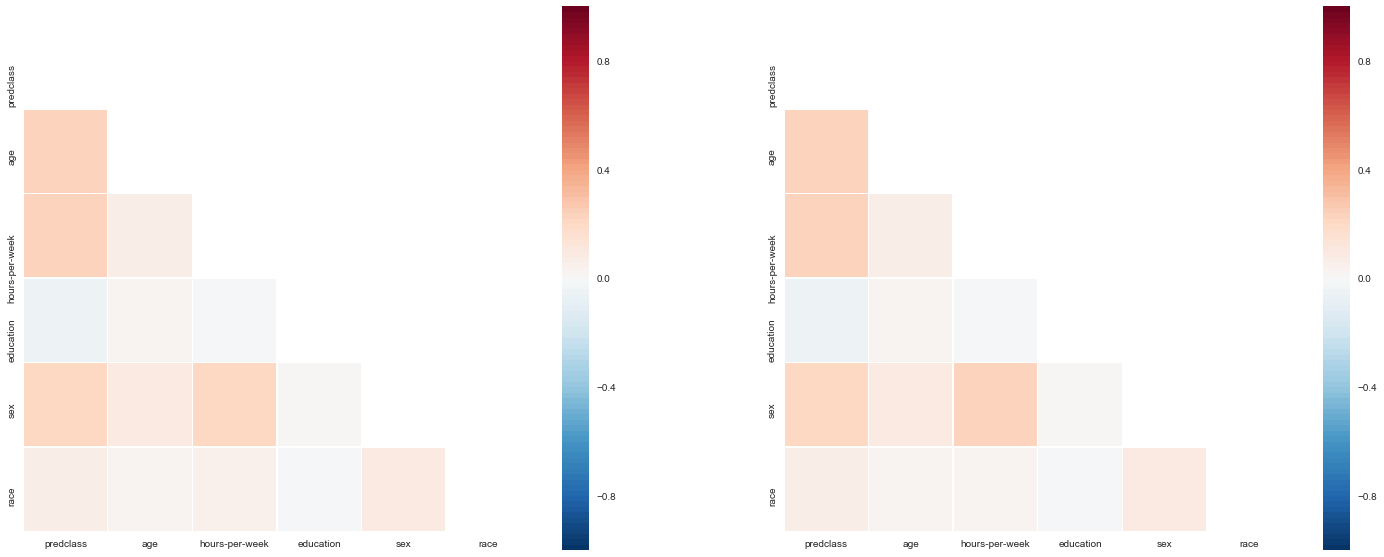

In [231]:
# Create a correlation plot of both datasets.
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(25,10)) 

plt.subplot(1, 2, 1)
# Generate a mask for the upper triangle
mask = np.zeros_like(dataset_bin_enc.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(dataset_bin_enc.corr(), 
            vmin=-1, vmax=1, 
            square=True, 
            cmap=sns.color_palette("RdBu_r", 100), 
            mask=mask, 
            linewidths=.5);

plt.subplot(1, 2, 2)
mask = np.zeros_like(dataset_con_enc.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(dataset_con_enc.corr(), 
            vmin=-1, vmax=1, 
            square=True, 
            cmap=sns.color_palette("RdBu_r", 100), 
            mask=mask, 
            linewidths=.5);

## More Complex Graphs 

### Feature Importance and PCA

Random forest consists of a number of decision trees. Every node in the decision trees is a condition on a single feature, designed to split the dataset into two so that similar response values end up in the same set. The measure based on which the (locally) optimal condition is chosen is called impurity. When training a tree, it can be computed how much each feature decreases the weighted impurity in a tree. For a forest, the impurity decrease from each feature can be averaged and the features are ranked according to this measure. This is the feature importance measure exposed in sklearn’s Random Forest implementations.

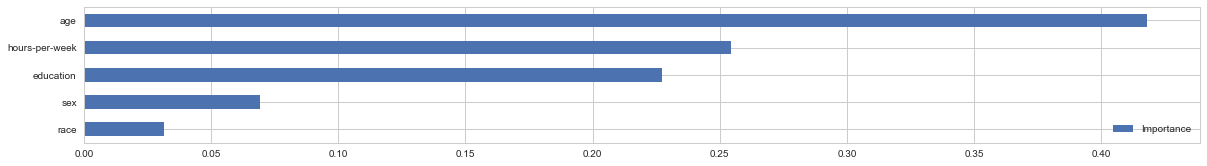

In [235]:
# Using Random Forest to gain an insight on Feature Importance
clf = RandomForestClassifier()
clf.fit(dataset_con_enc.drop('predclass', axis=1), dataset_con_enc['predclass'])

plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=dataset_con_enc.drop('predclass', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components.

We can use PCA to reduce the number of features to use in our ML algorithms, and graphing the variance gives us an idea of how many features we really need to represent our dataset fully.

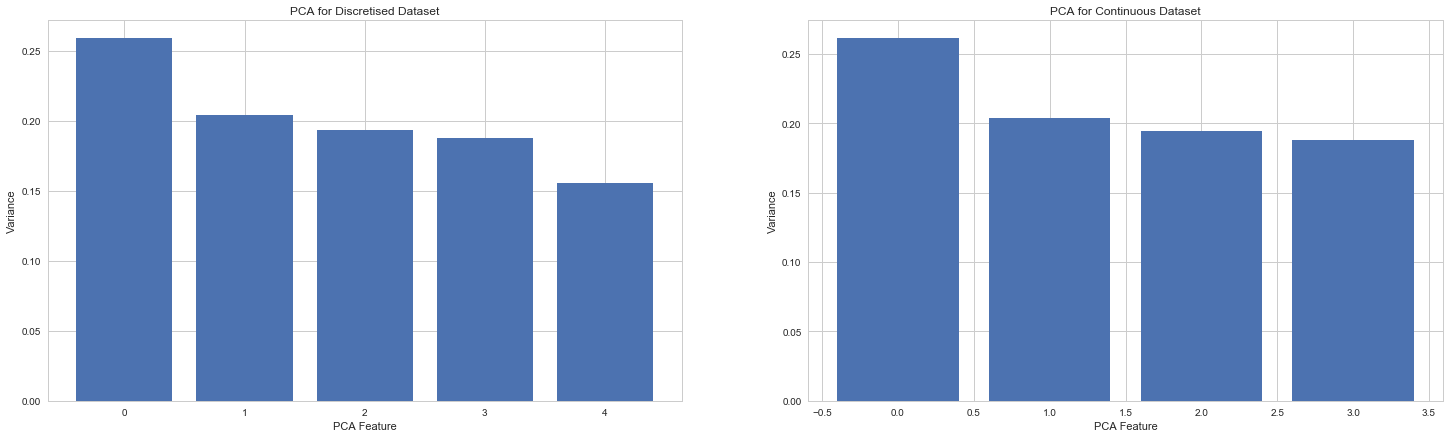

In [233]:
# Calculating PCA for both datasets, and graphing the Variance for each feature, per dataset
std_scale = preprocessing.StandardScaler().fit(dataset_bin_enc.drop('predclass', axis=1))
X = std_scale.transform(dataset_bin_enc.drop('predclass', axis=1))
pca1 = PCA(n_components=len(dataset_bin_enc.columns)-1)
fit1 = pca1.fit(X)

std_scale = preprocessing.StandardScaler().fit(dataset_con_enc.drop('predclass', axis=1))
X = std_scale.transform(dataset_con_enc.drop('predclass', axis=1))
pca2 = PCA(n_components=len(dataset_con_enc.columns)-2)
fit2 = pca2.fit(X)

# Graphing the variance per feature
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(25,7)) 

plt.subplot(1, 2, 1)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for Discretised Dataset')
plt.bar(range(0, fit1.explained_variance_ratio_.size), fit1.explained_variance_ratio_);

plt.subplot(1, 2, 2)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for Continuous Dataset')
plt.bar(range(0, fit2.explained_variance_ratio_.size), fit2.explained_variance_ratio_);

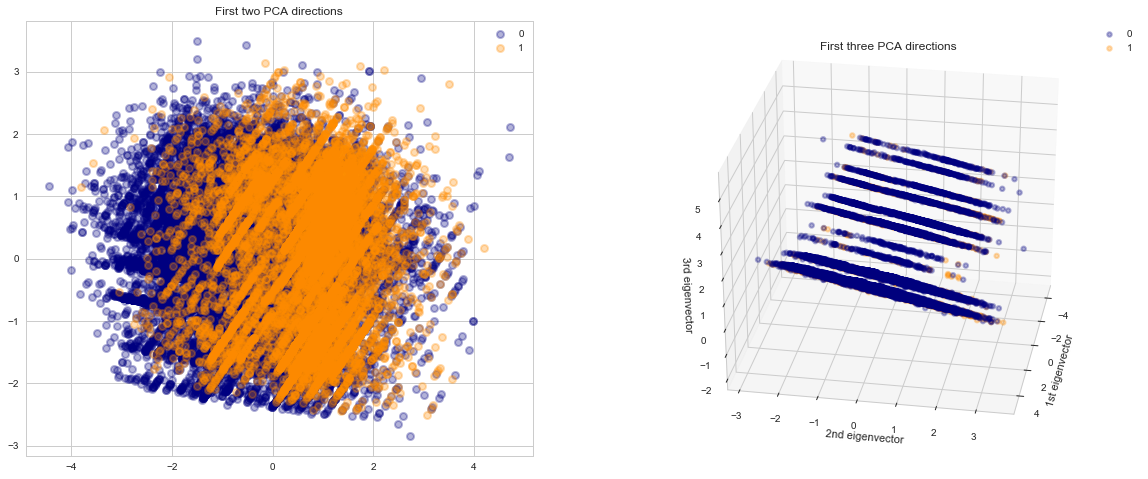

In [234]:
# PCA's components graphed in 2D and 3D
# Apply Scaling 
std_scale = preprocessing.StandardScaler().fit(dataset_con_enc.drop('predclass', axis=1))
X = std_scale.transform(dataset_con_enc.drop('predclass', axis=1))
y = dataset_con_enc['predclass']

# Formatting
target_names = [0,1]
colors = ['navy','darkorange']
lw = 2
alpha = 0.3
# 2 Components PCA
plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');

# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
               color=color,
               alpha=alpha,
               lw=lw, 
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# rotate the axes
ax.view_init(30, 10)